# project-work-flow

## 1. Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

# 

## 2. Load the dataset

In [2]:
data=pd.read_csv("Bengaluru_House_Data (1).csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 

## 3.Exploratory data analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# 

# 

# 

## 4. Data cleaning

In [5]:
data=data.drop(["availability","society","area_type","balcony"],axis=1)

In [6]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


**Checking missing values**

In [7]:
data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

**Remove duplicated values**

In [10]:
data.drop(data[data.duplicated()].index)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00


In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12365 entries, 0 to 13318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12365 non-null  object 
 1   size        12365 non-null  object 
 2   total_sqft  12365 non-null  object 
 3   bath        12365 non-null  float64
 4   price       12365 non-null  float64
dtypes: float64(2), object(3)
memory usage: 579.6+ KB


# 

## 5. Feature Engineering

**Making the new column from existing one**

In [13]:
data['BHK']=data["size"].apply(lambda x: int(x.split(' ')[0]))

In [14]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2


In [15]:
data[data["BHK"]>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Changing the values in the column**

In [17]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
data[~data['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

In [21]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [22]:
data.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
BHK            0
dtype: int64

In [23]:
data=data.dropna()

**Let insert a new column “price_per_sqft”**

In [24]:
data.insert(4,"price_per_sqft",data.price*100000/data.total_sqft)

In [25]:
data.price_per_sqft=data.price_per_sqft.round(2)

In [26]:
data

,location,size,total_sqft,bath,price_per_sqft,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,3699.81,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4615.38,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,4305.56,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,6245.89,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,4250.00,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,6530.61,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,6689.83,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,11111.11,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,5258.55,60.00,2


**Now we replace with ”other” string ,the location which have less than 10 entries in the dataset**

In [27]:
location_stats=data.location.value_counts()

In [28]:
len(location_stats[location_stats<=10])

1068

In [29]:
locationlessthan10=location_stats[location_stats<=10]

In [30]:
locationlessthan10

Dodsworth Layout     10
Gunjur Palya         10
Ganga Nagar          10
BTM 1st Stage        10
Dairy Circle         10
                     ..
Vidyapeeta            1
Maruthi Extension     1
Okalipura             1
Old Town              1
Abshot Layout         1
Name: location, Length: 1068, dtype: int64

In [31]:
len(data.location.unique())

1298

**we will replace with “other” string all this 1068 entries**

In [32]:
data.location=data.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data.location.unique())

231

In [33]:
data.head()

,location,size,total_sqft,bath,price_per_sqft,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,3699.81,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4615.38,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,4305.56,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,6245.89,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,4250.00,51.00,2


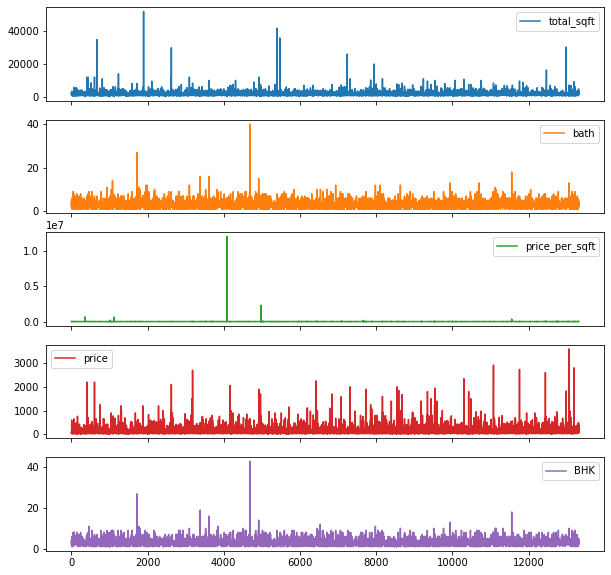

In [34]:
data.plot.line(figsize=(10,10),subplots=True,);

# 

## 6. Outlire removal using business logic

In [35]:
data=data[~(data.total_sqft/data.BHK<300)]
data.head(10)

,location,size,total_sqft,bath,price_per_sqft,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,3699.81,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,4615.38,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,4305.56,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,6245.89,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,4250.00,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,3247.86,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,7467.06,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,18181.82,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,4828.24,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,3888.89,70.00,3


In [36]:
data.shape

(11590, 7)

In [37]:
data["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count     11590.000000
mean       6402.285237
std        4273.223134
min         267.830000
25%        4255.320000
50%        5347.155000
75%        7000.000000
max      176470.590000
Name: price_per_sqft, dtype: object

### remove bath outlier :

In [38]:
data=data[data.bath<data.BHK+2]

In [39]:
data.shape

(11439, 7)

# 

## 7.Outlire removal using standard deviation and mean

**remove price per sq_ft outlier :**

In [40]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data=remove_pps_outliers(data)
data.shape
remove_pps_outliers(data)

,location,size,total_sqft,bath,price_per_sqft,price,BHK
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3520.00,44.00,3
1,Devarachikkanahalli,2 BHK,1170.0,2.0,3418.80,40.00,2
2,Devarachikkanahalli,3 BHK,1425.0,2.0,4561.40,65.00,3
3,Devarachikkanahalli,2 BHK,947.0,2.0,4540.65,43.00,2
4,Devarachikkanahalli,2 BHK,1230.0,2.0,4715.45,58.00,2
...,...,...,...,...,...,...,...
6342,other,3 BHK,1508.0,3.0,5106.10,77.00,3
6343,other,2 BHK,1200.0,2.0,5833.33,70.00,2
6344,other,2 BHK,1095.0,2.0,5205.48,57.00,2
6345,other,3 BHK,1440.0,2.0,4439.58,63.93,3


**remove BHK outlier :**

In [41]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data=remove_bhk_outliers(data)
data.shape

(6700, 7)

**now drop some columns which are not so far needed**

In [42]:
data1=data.drop(['size','price_per_sqft'],axis='columns')
data=data.drop(['size','price_per_sqft'],axis='columns')
data

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,43.0,2
...,...,...,...,...,...
9394,other,1650.0,1.0,130.0,2
9398,other,1155.0,2.0,64.0,2
9400,other,1200.0,2.0,70.0,2
9401,other,1800.0,1.0,200.0,1


# 

## 8. Data visualization

In [43]:
data.corr()

,total_sqft,bath,price,BHK
total_sqft,1.000000,0.690253,0.841410,0.667843
bath,0.690253,1.000000,0.593691,0.893506
price,0.841410,0.593691,1.000000,0.562473
BHK,0.667843,0.893506,0.562473,1.000000


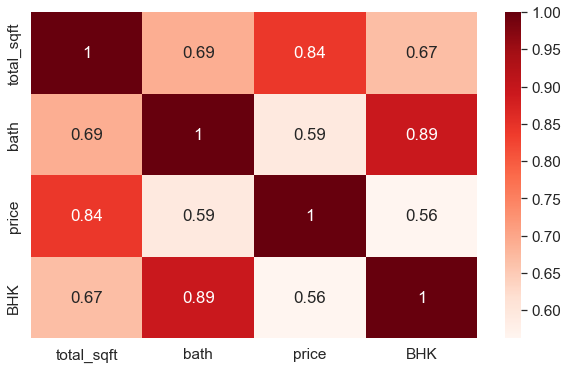

In [44]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(), annot= True, cmap = "Reds")
plt.show()

**Regression lines**

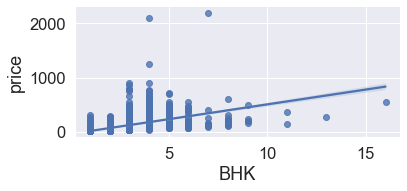

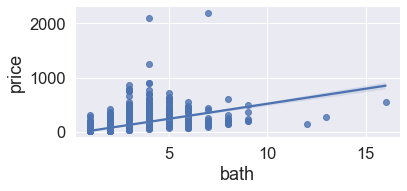

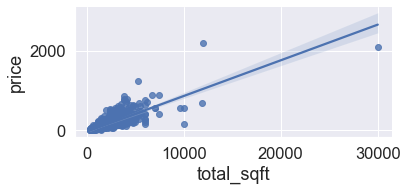

In [45]:
sns.set(font_scale=1.5)
sns.lmplot(data = data, x = "BHK", y = "price",aspect=2, height=3)
sns.lmplot(data=data,x="bath",y="price",aspect=2,height=3)
sns.lmplot(data=data,x="total_sqft",y="price",aspect=2,height=3)
plt.show()

# 

## 9. Make all the collumns numeric type

**With pd.dummies we can create columns with the row label.**

In [46]:
dummies=pd.get_dummies(data.location)
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Now concatenate the data after run all the above code, with the dummies data**

In [47]:
data=pd.concat([data,dummies.drop("other",axis="columns")],axis="columns")

In [48]:
data.head()

,location,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data=data.drop(['location'],axis=1)
data

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9394,1650.0,1.0,130.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9398,1155.0,2.0,64.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9400,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9401,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 1 to 9405
Columns: 234 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(1), uint8(230)
memory usage: 1.7 MB


# 

**make X and y**

In [51]:
X=data.drop(["price"],axis=1)
y=data["price"]

## 10. Split the data into train and test

**Then split dataset into training and testing data which means select 20% of the data randomly and separate it from the training data.**

In [52]:
np.random.seed(30)
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, 
                                                   y, 
                                                   test_size = 0.2)

In [53]:
y_test

2736    128.00
8796    410.00
9058    100.00
2298     95.00
5728     60.00
         ...  
6833     85.00
4944     38.55
883      85.00
670     108.00
4088    210.00
Name: price, Length: 1340, dtype: float64

# 

## 11.Building models

Linear regression

In [54]:
from sklearn import linear_model

In [55]:
model1=linear_model.LinearRegression()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8742498293374326

# 

Ridge regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
model2=Ridge()
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.8751676248128201

# 

**Ensemble Model**

Random Forest regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

model3=RandomForestRegressor()
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8498515039449465

# 

## 12.Test the model for few properties

In [59]:
def price_predict(location,sqft,bath,BHK):
    loc_index=np.where(X.columns==location)[0] 
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=BHK
    if loc_index >=0:
        x[loc_index]=1
    return model2.predict([x])[0]

In [60]:
price_predict('Electronic City Phase II',1056,2,2)

38.93751697897019

In [61]:
price_predict('1st Phase JP Nagar',1500,2,3)

126.70798646575368

In [62]:
price_predict('5th Phase JP Nagar',900,2,2)

27.385166097937862

In [63]:
price_predict('5th Block Hbr Layout',1206,2,2)

23.06215767363308

# 

## 13. Export the tested model to pickle file

In [68]:
import pickle

pickle.dump(model2,open("random_forest_model_1.pkl","wb"))

In [69]:
loaded_model = pickle.load(open("random_forest_model_1.pkl","rb"))
loaded_model.score(X_test,y_test)

0.8751676248128201